In [4]:
"""
Purpose: Determine the distribution of the size of the different compartment groups that are passed through the spine analysis
"""

'\nPurpose: Determine the distribution of the size of the different compartment groups that are passed through the spine analysis\n'

In [5]:
import datajoint as dj
import numpy as np
import time
import seaborn as sns
sns.set()

In [6]:
pinky = dj.create_virtual_module("pinky","microns_pinky")

Connecting celiib@10.28.0.34:3306


In [ ]:
"""  These two tables are the ones that need to be pulled from """

In [7]:
pinky.CompartmentOrphan.ComponentOrphan()

segmentation segmentation id,segment_id segment id unique within each Segmentation,decimation_ratio,"compartment_type Basal, Apical, spine head, etc.",component_index Which sub-compartment of a certain label this is.,n_vertex_indices,n_triangle_indices,vertex_indices preserved indices of each vertex of this sub-compartment,triangle_indices preserved indices of each triangle of this sub-compartment
3,648518346341352891,0.35,Error,0,21316,42947,=BLOB=,=BLOB=
3,648518346341353058,0.35,Dendrite,0,38766,77289,=BLOB=,=BLOB=
3,648518346341353574,0.35,Basal,0,45208,90242,=BLOB=,=BLOB=
3,648518346341353574,0.35,Basal,1,862,1686,=BLOB=,=BLOB=
3,648518346341353574,0.35,Error,0,1943,3870,=BLOB=,=BLOB=
3,648518346341353574,0.35,Soma,0,10615,21128,=BLOB=,=BLOB=
3,648518346341353607,0.35,Dendrite,0,68095,135916,=BLOB=,=BLOB=
3,648518346341353788,0.35,Dendrite,0,9740,19406,=BLOB=,=BLOB=
3,648518346341354313,0.35,Dendrite,0,45794,91301,=BLOB=,=BLOB=
3,648518346341354496,0.35,Dendrite,0,61171,122012,=BLOB=,=BLOB=


Total length of excitatory = 343


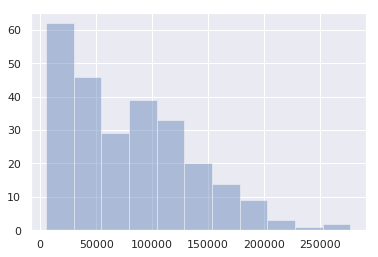

In [25]:
"""
Lets find the different distributions of the sizes

"""

comp_type = "Apical"

search_key = dict(segmentation=3,decimation_ratio=0.35,compartment_type = comp_type)
excitatory_n_vertices = (pinky.CompartmentFinal.ComponentFinal() & search_key).fetch("n_vertex_indices")
print(f"Total length of excitatory = {len(excitatory_n_vertices)}")

#filter them for sizes greater than 5000
excitatory_n_vertices_size_filtered = excitatory_n_vertices[excitatory_n_vertices>5000]

#get the distribution
ax = sns.distplot(excitatory_n_vertices_size_filtered,kde=False)



In [26]:
#get the quartiles for that group
q1 = np.percentile(excitatory_n_vertices_size_filtered, 25)
q2 = np.percentile(excitatory_n_vertices_size_filtered, 50)
q3 = np.percentile(excitatory_n_vertices_size_filtered, 75)
iq_1 = q2 - q1
iq_2 = q3 - q2
iq_average = (iq_1 + iq_2)/2
lower_bounds = q1 - iq_average
upper_bounds = q3 + iq_average

print(lower_bounds,q1,q2,q3,upper_bounds)

#check that these numbers aren't too low or too high
if lower_bounds < np.min(excitatory_n_vertices_size_filtered):
    print(f"lower bounds value of {lower_bounds} was too low so changing to the minimum value")
    lower_bounds = np.min(excitatory_n_vertices_size_filtered)

if upper_bounds > np.max(excitatory_n_vertices_size_filtered):
    print(f"upper bounds value of {upper_bounds} was too low so changing to the minimum value")
    upper_bounds = np.max(excitatory_n_vertices_size_filtered)

boundaries = (lower_bounds,q1,q2,q3,upper_bounds)
print("boundaries = " + str(boundaries))

-10802.75 31170.25 73118.0 115116.25 157089.25
lower bounds value of -10802.75 was too low so changing to the minimum value
boundaries = (5078, 31170.25, 73118.0, 115116.25, 157089.25)


In [33]:
boundary_restrictions = "n_vertex_indices >= " + str(boundaries[0]) + " AND n_vertex_indices <= " + str(boundaries[1])
print("boundary_restrictions = " + str(boundary_restrictions))

search_key = dict(segmentation=3,decimation_ratio=0.35,compartment_type = comp_type)
excitatory_n_vertices_boundary = pinky.CompartmentFinal.ComponentFinal() & search_key & boundary_restrictions#).fetch("n_vertex_indices")
n_vertex_indices_with_boundaries = excitatory_n_vertices_boundary.fetch("n_vertex_indices")
print(np.min(n_vertex_indices_with_boundaries),np.max(n_vertex_indices_with_boundaries))

"""
At this point have all the components within a size range of that specific compartment type but do not have them grouped by neurons
"""
excitatory_n_vertices_boundary.fetch("segment_id","component_index")

boundary_restrictions = n_vertex_indices >= 5078 AND n_vertex_indices <= 31170.25
5078 31015


segmentation segmentation id,segment_id segment id unique within each Segmentation,decimation_ratio,"compartment_type Basal, Apical, spine head, etc.",component_index Which sub-compartment of a certain label this is.,n_vertex_indices,n_triangle_indices,vertex_indices preserved indices of each vertex of this sub-compartment,triangle_indices preserved indices of each triangle of this sub-compartment
3,648518346349470171,0.35,Apical,0,10652,21204,=BLOB=,=BLOB=
3,648518346349471500,0.35,Apical,0,19034,37938,=BLOB=,=BLOB=
3,648518346349473583,0.35,Apical,0,10210,20332,=BLOB=,=BLOB=
3,648518346349473835,0.35,Apical,0,25979,51869,=BLOB=,=BLOB=
3,648518346349474146,0.35,Apical,0,5460,10864,=BLOB=,=BLOB=
3,648518346349475101,0.35,Apical,0,6404,12698,=BLOB=,=BLOB=
3,648518346349475510,0.35,Apical,0,7138,14149,=BLOB=,=BLOB=


In [36]:
#assemble into dictionaries for segment_ids:
neuron_data = dict()
neuron_data["Apical"]= dict()
neuron_data["Apical"]["group1"] = []

In [30]:
len(excitatory_n_vertices_size_filtered)

258